In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
# dataset path
data_path_enhancer = '/data/eqtl/3_ATAC_0.9_1/'
data_path_repressor = '/data/eqtl/3_ATAC_0.9_0/'

#### 1 seq distribution 

In [3]:
len_dict1 = {'1-1000':0,'1001-10000':0,'10001-100000':0,'100001-1000000':0,'1000000+':0}
# count enhancer sequence len
with open("gtex_list.txt") as r:
    lines = r.readlines()
    gtex_bulk_list = []
    for line in lines:
        gtex_bulk_list.append(line.strip())
    print(gtex_bulk_list)
    
for bulk in gtex_bulk_list:
    for chr_no in range(1, 23):
        data = pd.read_pickle(data_path_enhancer + bulk + '_' + str(chr_no) + '.pkl')
        for i in range(len(data)):        
            tss_distance = abs(int(data['tss_distance'].values[i]))
            #print(tss_distance)
            if(tss_distance <= 1000):
                len_dict1['1-1000'] += 1
            elif(tss_distance > 1000 and tss_distance <= 10000):
                len_dict1['1001-10000'] += 1
            elif(tss_distance > 10000 and tss_distance <= 100000):
                len_dict1['10001-100000'] += 1
            elif(tss_distance > 100000 and tss_distance <= 1000000):
                len_dict1['100001-1000000'] += 1
            else:
                len_dict1['1000000+'] += 1
        
print(len_dict1)

['Adipose_Subcutaneous', 'Adrenal_Gland', 'Artery_Tibial', 'Brain_Cerebellum', 'Brain_Cortex', 'Breast_Mammary_Tissue', 'Colon_Sigmoid', 'Colon_Transverse', 'Esophagus_Mucosa', 'Heart_Left_Ventricle', 'Liver', 'Nerve_Tibial', 'Ovary', 'Pancreas', 'Prostate', 'Spleen', 'Stomach', 'Testis', 'Thyroid']
{'1-1000': 3229, '1001-10000': 9577, '10001-100000': 27461, '100001-1000000': 8900, '1000000+': 0}


In [4]:
len_dict0 = {'1-1000':0,'1001-10000':0,'10001-100000':0,'100001-1000000':0,'1000000+':0}
# count repressor sequence len
with open("gtex_list.txt") as r:
    lines = r.readlines()
    gtex_bulk_list = []
    for line in lines:
        gtex_bulk_list.append(line.strip())
    print(gtex_bulk_list)
    
for bulk in gtex_bulk_list:
    for chr_no in range(1, 23):
        data = pd.read_pickle(data_path_repressor + bulk + '_' + str(chr_no) + '.pkl')
        for i in range(len(data)):        
            tss_distance = abs(int(data['tss_distance'].values[i]))
            #print(tss_distance)
            if(tss_distance <= 1000):
                len_dict0['1-1000'] += 1
            elif(tss_distance > 1000 and tss_distance <= 10000):
                len_dict0['1001-10000'] += 1
            elif(tss_distance > 10000 and tss_distance <= 100000):
                len_dict0['10001-100000'] += 1
            elif(tss_distance > 100000 and tss_distance <= 1000000):
                len_dict0['100001-1000000'] += 1
            else:
                len_dict0['1000000+'] += 1
        
print(len_dict0)

['Adipose_Subcutaneous', 'Adrenal_Gland', 'Artery_Tibial', 'Brain_Cerebellum', 'Brain_Cortex', 'Breast_Mammary_Tissue', 'Colon_Sigmoid', 'Colon_Transverse', 'Esophagus_Mucosa', 'Heart_Left_Ventricle', 'Liver', 'Nerve_Tibial', 'Ovary', 'Pancreas', 'Prostate', 'Spleen', 'Stomach', 'Testis', 'Thyroid']
{'1-1000': 2937, '1001-10000': 8977, '10001-100000': 25642, '100001-1000000': 7240, '1000000+': 0}


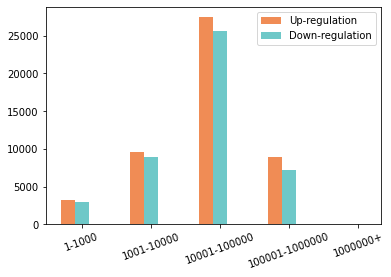

In [6]:
import matplotlib
import matplotlib.pyplot as plt

name_list = list(len_dict1.keys())
num_list1 = list(len_dict1.values())
num_list0 = list(len_dict0.values())  

width = 0.2

x = list(range(len(name_list)))
plt.bar(x, num_list1, width = width,label = 'Up-regulation', color='#F08C55')

for i in range(len(x)):
    x[i] = x[i] + width

plt.bar(x, num_list0, width = width,label = 'Down-regulation',tick_label = name_list, color='#6EC8C8')
plt.xticks(rotation=20)
plt.legend(loc = 'best')
plt.savefig("seq_dis.png", dpi=300, bbox_inches = 'tight')
plt.show()

#### 2 sample count

In [7]:
sample_dict1 = {}
for item in gtex_bulk_list:
    sample_dict1[item] = 0
print(sample_dict1)

for bulk in gtex_bulk_list:
    for chr_no in range(1, 23):
        data = pd.read_pickle(data_path_enhancer + bulk + '_' + str(chr_no) + '.pkl')
        sample_dict1[bulk] += len(data)
print(sample_dict1)

{'Adipose_Subcutaneous': 0, 'Adrenal_Gland': 0, 'Artery_Tibial': 0, 'Brain_Cerebellum': 0, 'Brain_Cortex': 0, 'Breast_Mammary_Tissue': 0, 'Colon_Sigmoid': 0, 'Colon_Transverse': 0, 'Esophagus_Mucosa': 0, 'Heart_Left_Ventricle': 0, 'Liver': 0, 'Nerve_Tibial': 0, 'Ovary': 0, 'Pancreas': 0, 'Prostate': 0, 'Spleen': 0, 'Stomach': 0, 'Testis': 0, 'Thyroid': 0}
{'Adipose_Subcutaneous': 1202, 'Adrenal_Gland': 412, 'Artery_Tibial': 1228, 'Brain_Cerebellum': 654, 'Brain_Cortex': 428, 'Breast_Mammary_Tissue': 660, 'Colon_Sigmoid': 566, 'Colon_Transverse': 660, 'Esophagus_Mucosa': 22250, 'Heart_Left_Ventricle': 14758, 'Liver': 270, 'Nerve_Tibial': 1378, 'Ovary': 276, 'Pancreas': 577, 'Prostate': 366, 'Spleen': 580, 'Stomach': 494, 'Testis': 1041, 'Thyroid': 1367}


In [8]:
sample_dict0 = {}
for item in gtex_bulk_list:
    sample_dict0[item] = 0
print(sample_dict0)

for bulk in gtex_bulk_list:
    for chr_no in range(1, 23):
        data = pd.read_pickle(data_path_repressor + bulk + '_' + str(chr_no) + '.pkl')
        sample_dict0[bulk] += len(data)
print(sample_dict0)

{'Adipose_Subcutaneous': 0, 'Adrenal_Gland': 0, 'Artery_Tibial': 0, 'Brain_Cerebellum': 0, 'Brain_Cortex': 0, 'Breast_Mammary_Tissue': 0, 'Colon_Sigmoid': 0, 'Colon_Transverse': 0, 'Esophagus_Mucosa': 0, 'Heart_Left_Ventricle': 0, 'Liver': 0, 'Nerve_Tibial': 0, 'Ovary': 0, 'Pancreas': 0, 'Prostate': 0, 'Spleen': 0, 'Stomach': 0, 'Testis': 0, 'Thyroid': 0}
{'Adipose_Subcutaneous': 1097, 'Adrenal_Gland': 349, 'Artery_Tibial': 1066, 'Brain_Cerebellum': 593, 'Brain_Cortex': 405, 'Breast_Mammary_Tissue': 599, 'Colon_Sigmoid': 545, 'Colon_Transverse': 613, 'Esophagus_Mucosa': 20869, 'Heart_Left_Ventricle': 12908, 'Liver': 238, 'Nerve_Tibial': 1235, 'Ovary': 253, 'Pancreas': 567, 'Prostate': 313, 'Spleen': 520, 'Stomach': 440, 'Testis': 977, 'Thyroid': 1209}


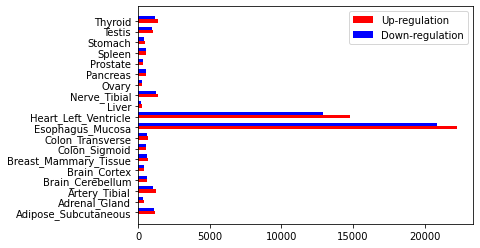

In [9]:
import matplotlib
import matplotlib.pyplot as plt

name_list = gtex_bulk_list
num_list1 = list(sample_dict1.values())
num_list0 = list(sample_dict0.values())  

x_width = range(0,len(name_list))
x2_width = [i+0.3 for i in x_width]
 
plt.barh(x_width,num_list1,lw=0.5,fc="r",height=0.3,label="Up-regulation")
plt.barh(x2_width,num_list0,lw=0.5,fc="b",height=0.3,label="Down-regulation")
plt.yticks(range(len(name_list)),name_list)

#plt.xticks(rotation=20)
plt.legend(loc = 'best')
plt.savefig("sample_count.png", dpi=300, bbox_inches = 'tight')
plt.show()